## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv')

## Verify data has been loaded correctly and will display √

In [35]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Potential questions to answer (Choose 5 Minimum)


>How many more promoters are there than detractors across our 2017 data?<br>
>Which track boasts the best promoter-to-detractor ratio?<br>
>Does the student experience get better the longer that they are enrolled at the Summer Academy?<br>
>Does student satisfaction vary by location?<br>
>What are things we could find here that could “help the business”?<br>
>What sorts of information does this dataset contain?<br>
>What kinds of questions might we be able to answer with this data?<br>
>What kinds of questions can’t we answer with this data?<br>
>What sorts of information might be actionable?<br>
>How can you present your findings in a way that non-technical employees can understand and use to make decisions?

## 1. Which locations had the highest number of attendees?

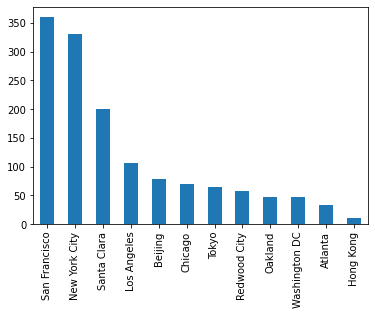

In [11]:
df['Location'].value_counts().plot(kind='bar')

> From the graph above, we can see that the locations with the highest number of attendees are San Francisco and New York

In [12]:
df.describe()

,ID
count,1453.000000
mean,759.235375
std,430.911349
min,8.000000
25%,387.000000
50%,764.000000
75%,1132.000000
max,1499.000000


In [13]:
df.shape

(1453, 6)

### Clean the data

In [10]:
df[df["Location"] == 'San Francisco'].dropna()
df["Rating (Num)"] = df["Rating (Num)"].apply(lambda x: int(x) if (x != "#ERROR!") else 5)

In [37]:
df[df['Rating (Num)'] >= '9'].head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
256,11,Atlanta,"Apps, Explorer",Week 1,9,Just right
257,15,Redwood City,Apps,Week 1,9,Just right
258,27,Los Angeles,Games,Week 1,9,Just right
259,30,Los Angeles,Apps,Week 1,9,Just right
260,32,Los Angeles,Apps,Week 1,9,A little too fast


## Promoters by Location

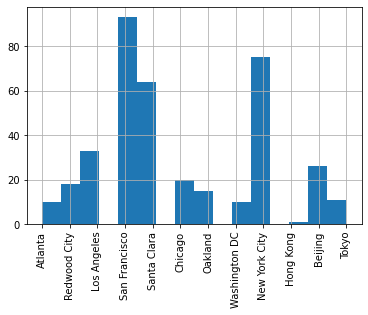

In [18]:
df[df['Rating (Num)'] >= '9']['Location'].hist(xrot=90, bins=16)

## Rating by Location

In [8]:
# Counts for each rating
df["Rating (Num)"].dropna().value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
1            2
0            2
2            2
Name: Rating (Num), dtype: int64

> The presence of #ERROR! indicates that further data cleaning is needed

In [29]:
# further data cleaning attempt
for value in df['Rating (Num)']:
    if value == "#ERROR!":
        value = 'NaN'
        
df["Rating (Num)"].dropna().value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
2            2
0            2
1            2
Name: Rating (Num), dtype: int64

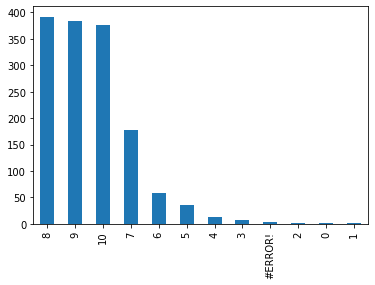

In [24]:
df['Rating (Num)'].value_counts().plot(kind='bar')

## Does the NPS rating have a corellation to the Schedule Pacing?

Rating (Num)
10    AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Schedule Pacing, dtype: object

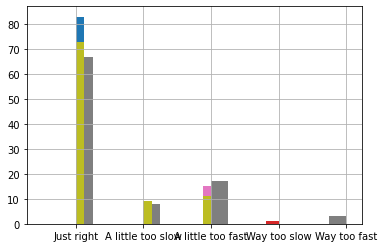

In [9]:
df[df["Location"] == 'San Francisco'].groupby('Rating (Num)')['Schedule Pacing'].hist(bins=16)

# for i in df[df['Location'] == 'San Francisco'].groupby("Rating (Num)")['Schedule Pacing']:
#     print(i)
    
# df[df['Location'] == 'San Francisco'].groupby('Rating (Num)')['Schedule Pacing'].value_counts()

> We can see from this graph that most of the Promoters felt that the schedule pacing was just right

In [10]:
df[df['Location'] == 'San Francisco']

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
2,117,San Francisco,Games,Week 1,4,Way too slow
7,65,San Francisco,Apps,Week 1,5,A little too slow
12,255,San Francisco,Apps,Week 2,5,Way too fast
18,441,San Francisco,"Apps, Explorer",Week 3,5,Just right
...,...,...,...,...,...,...
1343,1390,San Francisco,Apps,Week 7,10,Just right
1345,1392,San Francisco,Apps,Week 7,8,Just right
1349,1396,San Francisco,Games,Week 7,9,Just right
1351,1398,San Francisco,"Apps, Explorer",Week 7,7,Just right


Track
Apps              AxesSubplot(0.125,0.125;0.775x0.755)
Apps, Explorer    AxesSubplot(0.125,0.125;0.775x0.755)
Games             AxesSubplot(0.125,0.125;0.775x0.755)
VR                AxesSubplot(0.125,0.125;0.775x0.755)
Name: Schedule Pacing, dtype: object

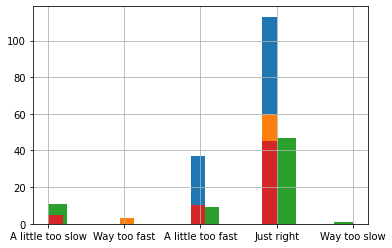

In [11]:
df[df["Location"] == 'San Francisco'].groupby('Track')['Schedule Pacing'].hist(bins=16)

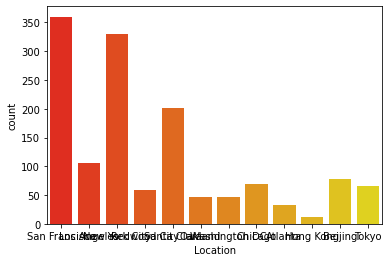

In [15]:
sns.countplot(x="Location", palette="autumn", data=df)

In [17]:
df['Promoters'] = df['Rating (Num)'] >= '9'

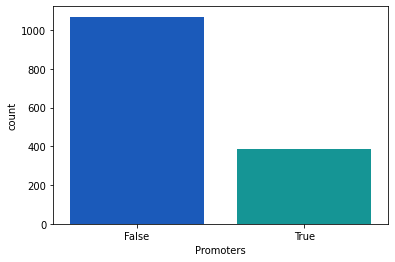

In [18]:
sns.countplot(x="Promoters", palette="winter", data=df)

> This graph represents the number of Promoters in comparision to those who were either Passive or Detractors

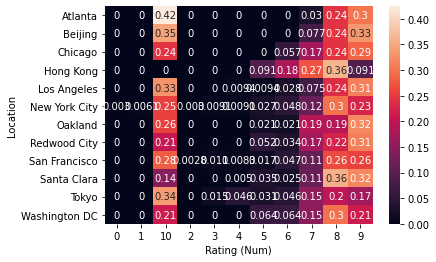

In [19]:
sns.heatmap(pd.crosstab(df['Location'], df['Rating (Num)'], normalize='index'), annot=True)

> From this heatmap we can begin to see which location has better ratings

In [15]:
df['Detractors'] = df['Rating (Num)'] <= '6'

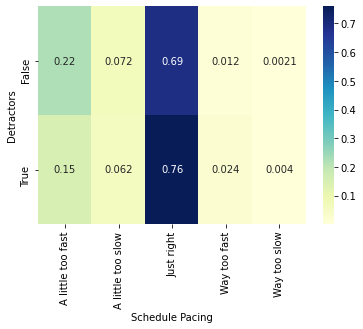

In [21]:
sns.heatmap(pd.crosstab(df['Detractors'], df['Schedule Pacing'], normalize='index'), cmap="YlGnBu", annot=True)

> Here we can see that the Schedule Pacing had no significant impact on the number of detractors

> Actually quite the opposite, as there are the highest number of detractors among those who felt the pacing was 'just right'

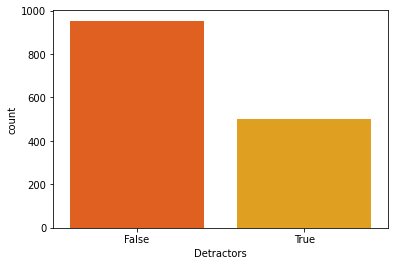

In [16]:
sns.countplot(x="Detractors", palette="autumn", data=df)

## Detractors by location

In [26]:
dict(df[df['Detractors'] == 1]['Location'].value_counts())

{'San Francisco': 132,
 'New York City': 119,
 'Santa Clara': 42,
 'Los Angeles': 40,
 'Tokyo': 31,
 'Beijing': 27,
 'Chicago': 21,
 'Redwood City': 17,
 'Washington DC': 16,
 'Atlanta': 14,
 'Oakland': 14,
 'Hong Kong': 3}

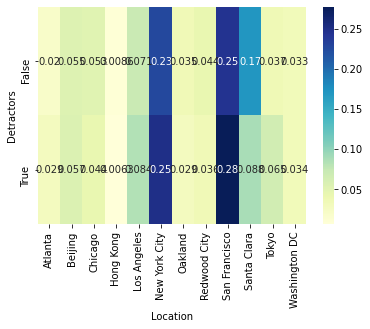

In [30]:
sns.heatmap(pd.crosstab(df['Detractors'], df['Location'], normalize='index'), cmap="YlGnBu", annot=True)

## Promoters by location

In [27]:
dict(df[df['Promoters'] == 1]['Location'].value_counts())

{'San Francisco': 93,
 'New York City': 75,
 'Santa Clara': 64,
 'Los Angeles': 33,
 'Beijing': 26,
 'Chicago': 20,
 'Redwood City': 18,
 'Oakland': 15,
 'Tokyo': 11,
 'Washington DC': 10,
 'Atlanta': 10,
 'Hong Kong': 1}

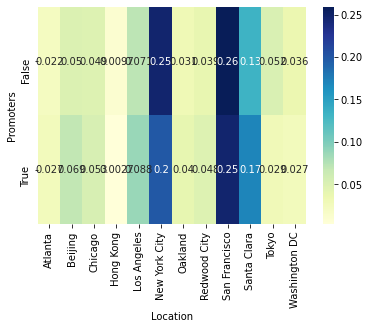

In [32]:
sns.heatmap(pd.crosstab(df['Promoters'], df['Location'], normalize='index'), cmap="YlGnBu", annot=True)

> Here we can see that the largest number of Promoters where at the NYC and SF locations

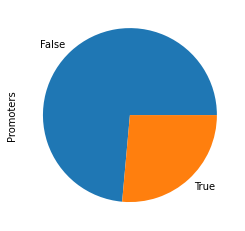

In [47]:
df['Promoters'].value_counts().plot(kind='pie')

In [49]:
df['Promoters'].value_counts()

False    1069
True      384
Name: Promoters, dtype: int64

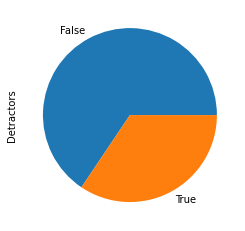

In [46]:
df['Detractors'].value_counts().plot(kind='pie')

In [48]:
df['Detractors'].value_counts()

False    953
True     500
Name: Detractors, dtype: int64

In [43]:
500 - 384

116

> There were 116 more Detractors than Promoters in this data set

In [44]:
500/(500 + 384)

0.5656108597285068

> This indicates that roughly 57% of all attendees who gave a rating, were classified as Detractorsk, which seems odd so we'll take a different approach

Promoter     760
Passive      569
Detractor    124
Name: Catagory, dtype: int64

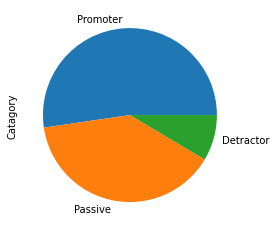

In [20]:
df["Catagory"] = df["Rating (Num)"].apply(lambda x: "Promoter" if (x >= 9) 
                                             else ("Detractor" if x <= 6 
                                              else "Passive"))

df['Catagory'].value_counts().plot(kind='pie')
df['Catagory'].value_counts()

> This gives us a somewhat clearer picture

## Overall NPS: 44%

In [22]:
(760 - 124)/(760 + 569 + 124)

0.4377150722642808

## Promoters by Track

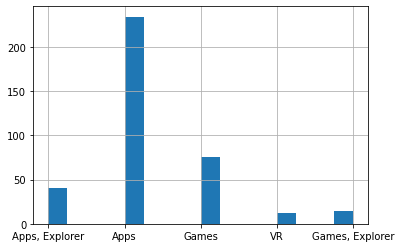

In [50]:
df[df['Rating (Num)'] >= '9']['Track'].hist(bins=16)

> Here we see that the Apps track, had the largest number of Promoters

## Detractors by Track

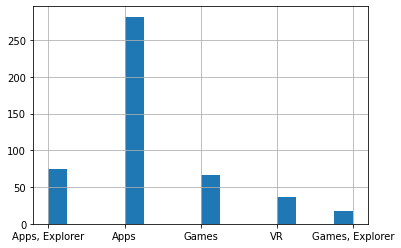

In [54]:
df[df['Rating (Num)'] <= '6']['Track'].hist(bins=16)

> The Apps track also had the largest number of Detractors

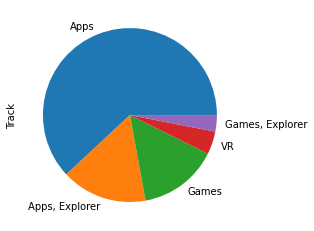

In [55]:
df['Track'].value_counts().plot(kind='pie')

> This is because the Apps track, had the largest number of enrollees

## Next, I try to see the average rating per week and per attendee

In [45]:
for week in df['Week']:
    df['Rating (Num)'].mean()
df['Rating (Num)'].plot

In [46]:
df.groupby(['Week', 'Rating (Num)']).mean()

ID
Week   Rating (Num)             
Week 1 3              134.000000
       4              615.333333
       5              314.111111
       6              186.500000
       7              380.625000
...                          ...
Week 7 10            1374.675676
Week 8 7             1442.000000
       8             1465.000000
       9             1444.333333
       10            1438.750000

[62 rows x 1 columns]

## What sorts of information does this dataset contain?

> The types of information contained in this dataset can be easily seen by examining the column titles. Additionally it contains the total number of attendees

In [58]:
df.tail()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Promoters,Detractors
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,False,True
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,False,False
1450,1497,New York City,Apps,Week 7,10,Just right,False,True
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,False,True
1452,1499,New York City,Apps,Week 5,8,Just right,False,False


## What kinds of questions can’t we answer with this data?

> We don't know what the contributing factors to overall satisfaction were.<br>
> Was 0 (zero) an option for rating, or does it indicate that the participant declined to rate?

## How can you present your findings in a way that non-technical employees can understand and use to make decisions?

> Visual elements such as bar graphs, heat maps, and pie charts make the information easier to understand 

## Other Questions to answer

> Average rating per attendee across all weeks<br>
> Explore ratio mapping